In [7]:
pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Ekstraksi Garis dengan Hough Transform


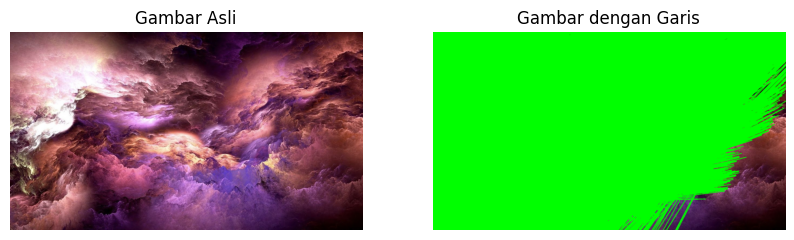

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\f87992cc-f105-4a89-b172-6347b7d5913c.jfif"

# Membaca gambar
image = cv2.imread(image_path)
# Mengubah gambar ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan Canny Edge Detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Menggunakan Hough Transform untuk mendeteksi garis
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Membuat salinan gambar untuk menggambar garis
line_image = np.copy(image)

# Menggambar garis yang terdeteksi
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Menampilkan gambar asli dan gambar dengan garis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gambar dengan Garis')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Template Matching untuk Deteksi Objek

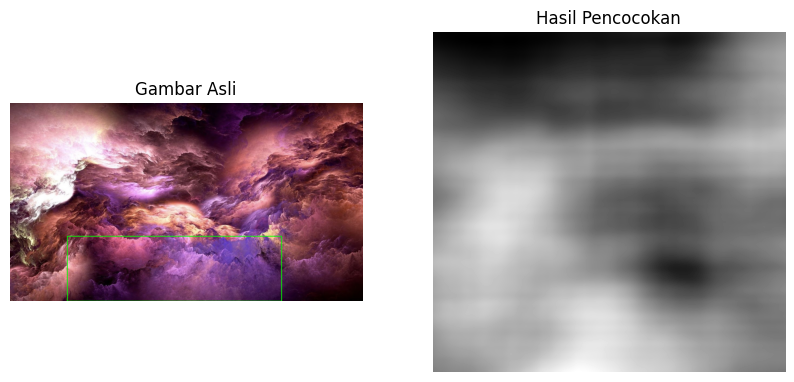

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar sumber dan template
source_image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\f87992cc-f105-4a89-b172-6347b7d5913c.jfif"
template_image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\output.png"  # Path ke gambar template

# Membaca gambar
source_image = cv2.imread(source_image_path)
template_image = cv2.imread(template_image_path)

# Mengubah gambar ke grayscale
source_gray = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Mendapatkan ukuran template
h, w = template_gray.shape

# Melakukan template matching
result = cv2.matchTemplate(source_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Menentukan lokasi pencocokan terbaik
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Menentukan titik kiri atas dan kanan bawah dari kotak
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# Menggambar kotak di sekitar area yang terdeteksi
cv2.rectangle(source_image, top_left, bottom_right, (0, 255, 0), 2)

# Menampilkan gambar asli dan hasil pencocokan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Pencocokan')
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.show()

Pembuatan Pyramid Gambar

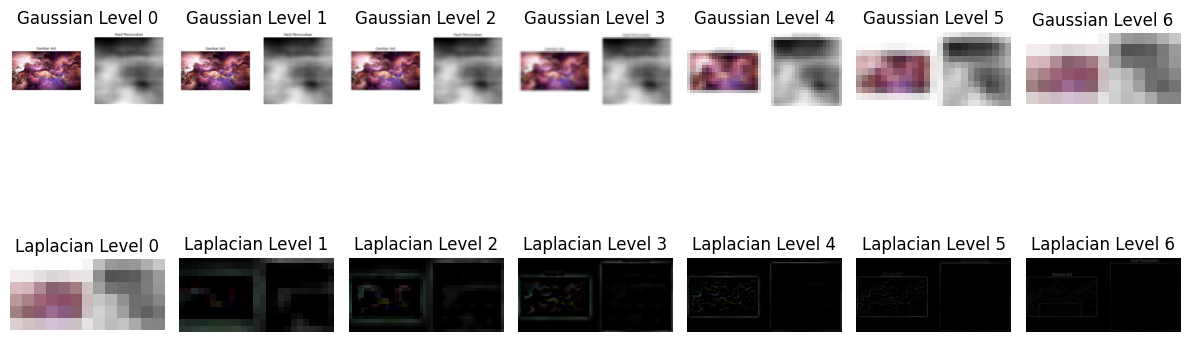

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\output 2.png"
image = cv2.imread(image_path)

if image is None:
    print("Error: Gambar tidak dapat dibaca. Periksa path file Anda.")
else:
    # Membuat Gaussian Pyramid
    gaussian_pyramid = [image.copy()]
    current_image = image.copy()
    
    for i in range(6):  # Membuat 6 level
        try:
            current_image = cv2.pyrDown(current_image)
            gaussian_pyramid.append(current_image.copy())
        except Exception as e:
            print(f"Error pada level Gaussian {i}: {str(e)}")
            break

    # Membuat Laplacian Pyramid
    laplacian_pyramid = [gaussian_pyramid[-1]]
    
    for i in range(len(gaussian_pyramid)-1, 0, -1):
        try:
            # Dapatkan ukuran yang sesuai untuk pyrUp
            size = (gaussian_pyramid[i-1].shape[1], gaussian_pyramid[i-1].shape[0])
            gaussian_expanded = cv2.pyrUp(gaussian_pyramid[i], dstsize=size)
            
            # Pastikan ukuran sesuai sebelum pengurangan
            if gaussian_expanded.shape == gaussian_pyramid[i-1].shape:
                laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_expanded)
                laplacian_pyramid.append(laplacian)
            else:
                print(f"Error: Ukuran tidak sesuai pada level {i}")
                break
        except Exception as e:
            print(f"Error pada level Laplacian {i}: {str(e)}")
            break

    try:
        # Menampilkan Gaussian Pyramid
        plt.figure(figsize=(12, 6))
        for i, img in enumerate(gaussian_pyramid):
            plt.subplot(2, len(gaussian_pyramid), i + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Gaussian Level {i}')
            plt.axis('off')

        # Menampilkan Laplacian Pyramid
        for i, img in enumerate(laplacian_pyramid):
            plt.subplot(2, len(gaussian_pyramid), i + len(gaussian_pyramid) + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Laplacian Level {i}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error saat menampilkan gambar: {str(e)}")

Deteksi Lingkaran Menggunakan Hough Transform

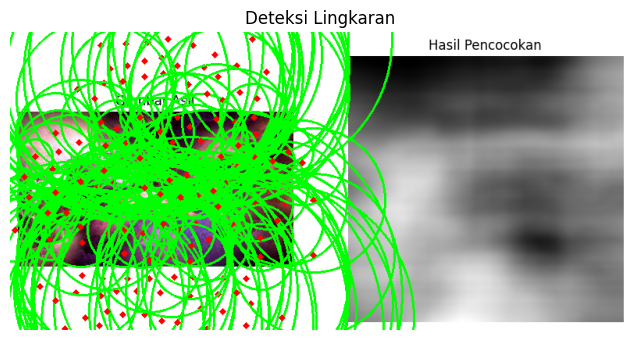

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\output 2.png"
image = cv2.imread(image_path)

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Menerapkan Hough Transform untuk mendeteksi lingkaran
circles = cv2.HoughCircles(blurred, 
                            cv2.HOUGH_GRADIENT, 
                            dp=1, 
                            minDist=20, 
                            param1=50, 
                            param2=30, 
                            minRadius=0, 
                            maxRadius=0)

# Jika lingkaran terdeteksi, gambar lingkaran pada gambar asli
if circles is not None:
    circles = np.uint16(np.around(circles))  # Mengubah ke tipe data integer
    for i in circles[0, :]:
        # Menggambar lingkaran luar
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Menggambar pusat lingkaran
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Menampilkan gambar dengan lingkaran yang terdeteksi
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Lingkaran')
plt.axis('off')
plt.show()

Ekstraksi Warna Dominan pada Gambar

c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Infinix X2\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


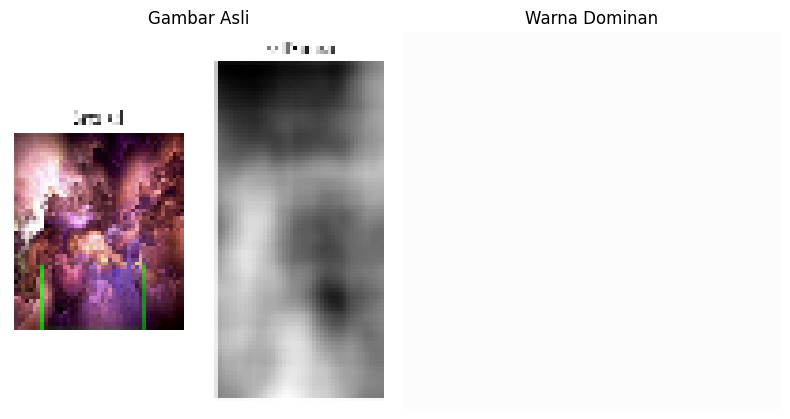

Warna Dominan (RGB): [253 252 252]


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path ke gambar
image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\output 2.png"
image = cv2.imread(image_path)

# Mengubah gambar dari BGR ke RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mengubah ukuran gambar untuk mempercepat proses
image = cv2.resize(image, (100, 100))

# Mengubah gambar menjadi array 2D
pixels = image.reshape(-1, 3)

# Menggunakan K-Means untuk mengelompokkan warna
k = 5  # Jumlah cluster
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Mendapatkan warna dominan
colors = kmeans.cluster_centers_
colors = colors.astype(int)

# Menghitung jumlah piksel di setiap cluster
labels, counts = np.unique(kmeans.labels_, return_counts=True)

# Menentukan warna dominan (cluster dengan jumlah piksel terbanyak)
dominant_color = colors[counts.argmax()]

# Menampilkan gambar asli dan warna dominan
plt.figure(figsize=(8, 6))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan warna dominan
plt.subplot(1, 2, 2)
plt.imshow(np.zeros((100, 100, 3), dtype=np.uint8) + dominant_color)
plt.title('Warna Dominan')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Warna Dominan (RGB): {dominant_color}')

Deteksi Kontur pada Gambar

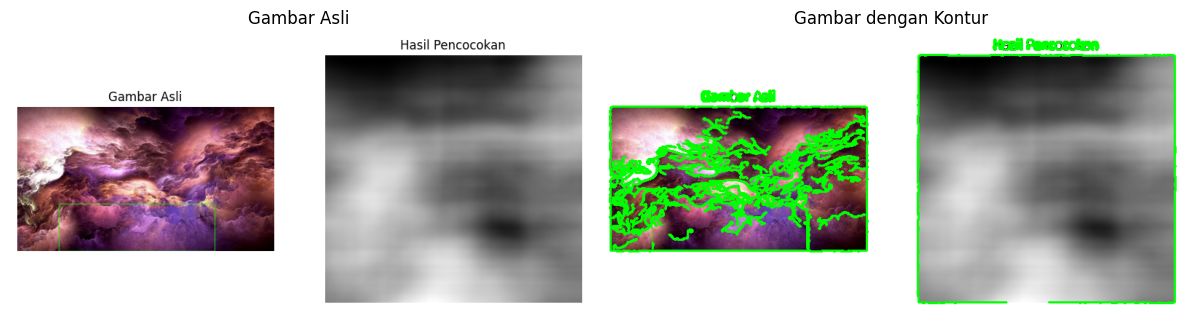

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke gambar
image_path = r"C:\Users\Infinix X2\Documents\SEMESTER 7\ROBOTIKA dan SISTEM CERDAS\Task Week 11\output 2.png"
image = cv2.imread(image_path)

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Menerapkan Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Mendeteksi kontur
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menggambar kontur pada gambar asli
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Menggambar kontur dengan warna hijau

# Menampilkan gambar asli dan gambar dengan kontur
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar dengan Kontur')
plt.axis('off')

plt.tight_layout()
plt.show()